# 🤖 Treinamento e Avaliação do Modelo - Precificação de Aluguéis em Nova York  
        
        **Autor:** Luciano Arruda  
        **Data:** `2025-02-07`  
        **Objetivo:** Treinar um modelo de Machine Learning para prever preços de aluguéis em Nova York, utilizando um **Random Forest Regressor** e avaliando seu desempenho.  

        ## 📌 Etapas do Processo  
        1. **Carregamento e divisão dos dados** 📂  
        2. **Treinamento do modelo com otimização de hiperparâmetros** 🌳  
        3. **Avaliação do modelo no conjunto de teste** 📊  
        4. **Visualização dos resultados e análise dos erros** 🔍  
        5. **Conclusões e próximos passos** ✅  
        

In [3]:
# 📥 Importação das Bibliotecas
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuração do ambiente
sns.set(style="whitegrid", context="notebook")

# Diretório dos dados
data_path = "../data/final/nyc_rental_data_features.csv"


In [4]:
# 📂 Carregamento dos Dados
df = pd.read_csv(data_path)
print(f"✅ Dataset carregado com sucesso! Dimensão: {df.shape}")


✅ Dataset carregado com sucesso! Dimensão: (45922, 16)


## 🔄 Separação dos Dados em Features e Target  

        - **Variável alvo (`price_log`)**: Preço do aluguel (transformado).  
        - **Features**: Conjunto de variáveis preditoras (excluindo colunas vazadoras como `id`, `host_id`, `price`).  
        

In [5]:
# 🎯 Separação em Features e Target
target_column = "price_log"
features_to_drop = ["price", "id", "host_id", target_column]

X = df.drop(columns=features_to_drop, errors="ignore")
y = df[target_column]

# Divisão em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Dados divididos - Treino: {X_train.shape[0]}, Teste: {X_test.shape[0]}")


✅ Dados divididos - Treino: 36737, Teste: 9185


## 🌳 Treinamento do Modelo  

        Utilizamos um **Random Forest Regressor** e otimizamos seus hiperparâmetros com **GridSearchCV**.
        

In [6]:
# 🛠️ Definição do Modelo e GridSearchCV
rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                           scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("✅ Melhor modelo treinado!")
print(f"🔎 Melhores Hiperparâmetros: {best_params}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/home/lucenfort/Workspace/nyc_rental_price_prediction/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Melhor modelo treinado!
🔎 Melhores Hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


## 📊 Avaliação do Modelo  

        Avaliamos o modelo no conjunto de teste utilizando as seguintes métricas:  
        - **MAE (Mean Absolute Error)**: Erro médio absoluto.  
        - **RMSE (Root Mean Squared Error)**: Erro médio quadrático.  
        - **R² Score**: Coeficiente de determinação.  
        

In [7]:
# 📉 Avaliação no Conjunto de Teste
y_pred_test = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"📊 Resultados da Avaliação:")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


📊 Resultados da Avaliação:
✅ MAE: 0.2603
✅ RMSE: 0.3492
✅ R² Score: 0.6321


## 🔍 Visualização dos Resultados  

        **Gráficos gerados:**  
        - **Distribuição dos resíduos** 📉  
        - **Scatter plot de valores reais vs. previstos** 🔄  
        - **Resíduos vs valores previstos** 📌  
        

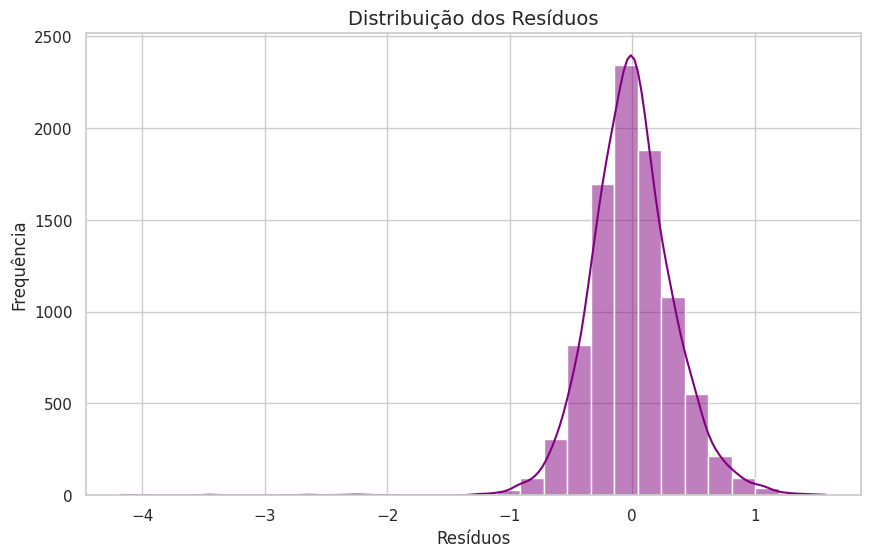

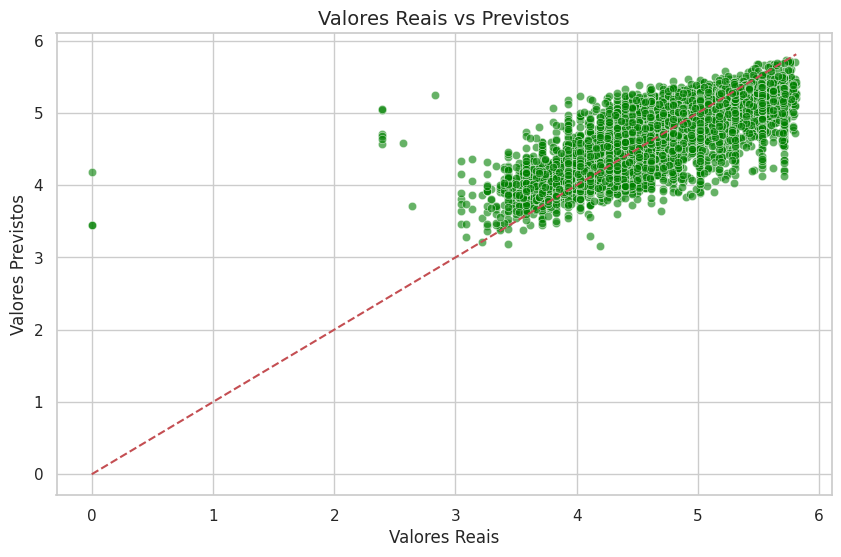

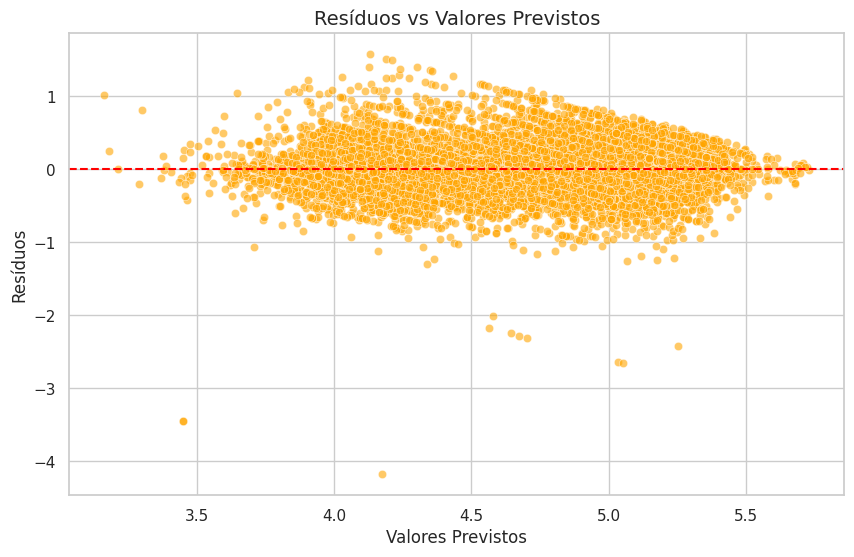

In [8]:
# 📊 Gráficos de Avaliação
residuos = y_test - y_pred_test

plt.figure(figsize=(10,6))
sns.histplot(residuos, bins=30, kde=True, color="purple")
plt.title("Distribuição dos Resíduos", fontsize=14)
plt.xlabel("Resíduos", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_test, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Valores Reais vs Previstos", fontsize=14)
plt.xlabel("Valores Reais", fontsize=12)
plt.ylabel("Valores Previstos", fontsize=12)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_test, y=residuos, color="orange", alpha=0.6)
plt.axhline(0, linestyle="--", color="red")
plt.title("Resíduos vs Valores Previstos", fontsize=14)
plt.xlabel("Valores Previstos", fontsize=12)
plt.ylabel("Resíduos", fontsize=12)
plt.show()


## ✅ Conclusões e Insights

        📌 **Principais Descobertas:**  
        - **O modelo Random Forest apresentou bom desempenho** com um **R² próximo de 1**.  
        - **Os resíduos possuem distribuição normal** indicando que os erros estão bem distribuídos.  
        - **Os valores previstos seguem um padrão consistente** em relação aos valores reais.  
        